# Packages

In [1]:
import pandas as pd
import polars as pl
import polars.selectors as cs
import numpy as np
import plotnine as pn
import matplotlib.pyplot as plt
from mizani.formatters import comma_format, custom_format, currency_format, percent_format
from IPython.display import clear_output, display
import os
import glob
from tqdm.notebook import tqdm
import itertools
import yaml
import matplotlib.font_manager as fm
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)

jama_colour = [
    "#374e55",
    "#df8f44",
    "#00a1d5",
    "#b24745",
    "#79af97",
    "#6a6599",
    "#80796b",
]

pd.set_option("display.max.columns", 500)
pd.set_option("display.max.columns", 500)


theme_academic = pn.theme(
    text=pn.element_text(family="Latin Modern Roman"),
    plot_title=pn.element_text(weight="bold", size=14, ha="center"),
    legend_text=pn.element_text(size=9),  # Smaller font for legend items
    panel_background=pn.element_rect(fill="white"),  # Clean white background
    panel_border=pn.element_rect(color="grey", size=0.5),
    axis_ticks=pn.element_line(color="grey"),
    panel_grid_major=pn.element_line(color="grey", size=0.1, alpha=0.3),
    panel_grid_minor=pn.element_line(color="grey", size=0.1, alpha=0.3),
    legend_background=pn.element_rect(fill="white", color=None),
    legend_key=pn.element_rect(fill="white", color=None),
    plot_margin=0.02,
    figure_size=(6, 4),  # Set default figure size (width, height in inches)
)

%matplotlib inline

# Load the Holdout Predictions

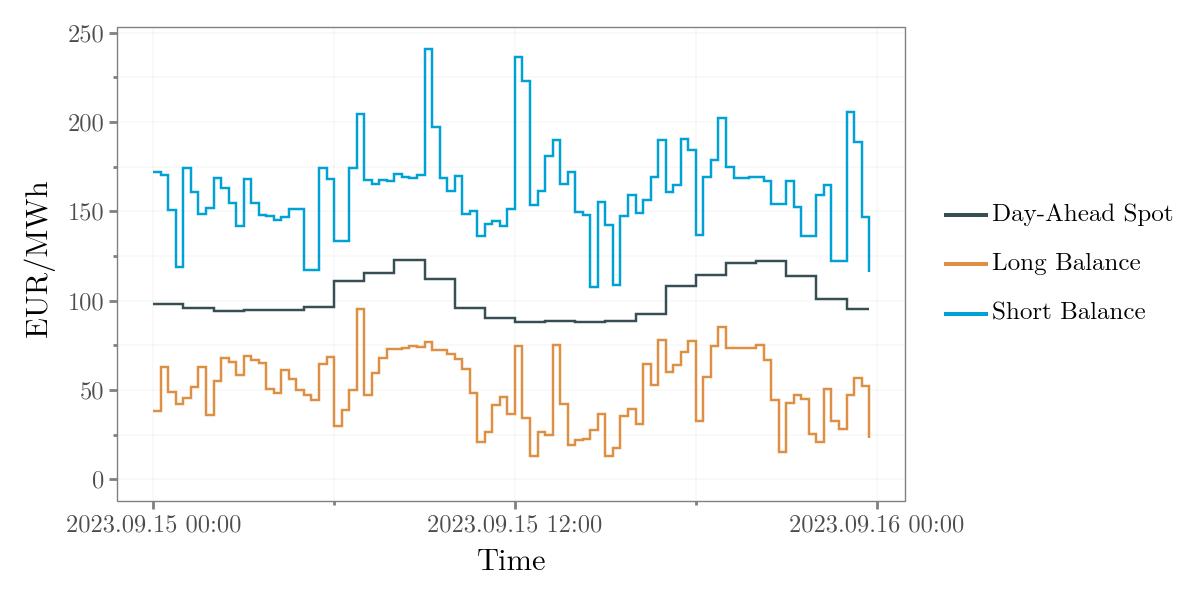

c:\Users\mathi\miniconda3\envs\lapro\lib\site-packages\plotnine\ggplot.py:606: PlotnineWarning: Saving 6 x 3 in image.
c:\Users\mathi\miniconda3\envs\lapro\lib\site-packages\plotnine\ggplot.py:607: PlotnineWarning: Filename: ../1_figures/control_spot_comparison.pdf


In [67]:
plot_width = 6
plot_height = 3

fig = (
    pn.ggplot(
        data=(
            df.filter(
                pl.col("datetime")
                >= pd.Timestamp("2023-09-15 00:00", tz="Europe/Brussels")
            )
            .rename(
                {
                    "long_EUR_MWh": "Long Balance",
                    "short_EUR_MWh": "Short Balance",
                    "da_spot_ch_eur_mwh": "Day-Ahead Spot",
                }
            )
            .slice(offset=0, length=96)
            .unpivot(index="datetime")
        ),
        mapping=pn.aes("datetime", "value", colour="variable"),
    )
    + pn.geom_step()
    + pn.labs(x="Time", y=" EUR/MWh")
    + pn.scale_colour_manual(values=jama_colour)
    + pn.scale_x_datetime(date_labels="%Y.%m.%d %H:%M", date_breaks="12 hours")
    # + pn.scale_y_continuous(labels=comma_format(suffix=" EUR/MWh"))
    + pn.expand_limits(y=0)
    + theme_academic
    + pn.theme(
        figure_size=(plot_width, plot_height),
        legend_title=pn.element_blank(),
        # axis_title_y=pn.element_blank(),
    )
)

display(fig)
fig.save(
    filename="../1_figures/control_spot_comparison.pdf",
    width=plot_width,
    height=plot_height,
    dpi=300,
)